In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
from sklearn.datasets import make_classification

In [2]:
from sklearn.model_selection import train_test_split

In [6]:
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1, 1], random_state=1)

In [8]:
X.shape

(2000, 20)

In [9]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [11]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

## Random Forests

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict_proba(X_train)
print('RF trainn roc auc {}'.format(roc_auc_score(y_train, y_train_pred[:,1])))
y_test_pred = rf_model.predict_proba(X_test)
print('RF test roc aurc {}'.format(roc_auc_score(y_test, y_test_pred[:,1])))

RF trainn roc auc 1.0
RF test roc aurc 0.9825444444444444


In [20]:
y_test_pred

array([[0.02, 0.98],
       [0.99, 0.01],
       [0.02, 0.98],
       ...,
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.02, 0.98]])

In [21]:
# y_test_pred[:, 1]

## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression()
log_classifier.fit(X_train, y_train)
y_train_pred = log_classifier.predict_proba(X_train)
print('RF trainn roc auc {}'.format(roc_auc_score(y_train, y_train_pred[:,1])))
y_test_pred = log_classifier.predict_proba(X_test)
print('RF test roc aurc {}'.format(roc_auc_score(y_test, y_test_pred[:,1])))

RF trainn roc auc 0.9863568922694498
RF test roc aurc 0.9885777777777777


## AdaBoost Classifier

In [27]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
y_train_pred = ada_classifier.predict_proba(X_train)
print('RF trainn roc auc {}'.format(roc_auc_score(y_train, y_train_pred[:,1])))
y_test_pred = ada_classifier.predict_proba(X_test)
print('RF test roc aurc {}'.format(roc_auc_score(y_test, y_test_pred[:,1])))

RF trainn roc auc 0.9975081174960356
RF test roc aurc 0.9826111111111111


## KNN Classifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_train_pred = knn_classifier.predict_proba(X_train)
print('RF trainn roc auc {}'.format(roc_auc_score(y_train, y_train_pred[:,1])))
y_test_pred = knn_classifier.predict_proba(X_test)
print('RF test roc aurc {}'.format(roc_auc_score(y_test, y_test_pred[:,1])))

RF trainn roc auc 0.981670071491109
RF test roc aurc 0.9426111111111111


## Now i will focus on selecting the threshold for maximum accuracy

In [30]:
pred = []
for model in [rf_model, log_classifier, ada_classifier, knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:, 1]))
    
final_prediction = pd.concat(pred, axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test, final_prediction)))

Ensemble test roc-auc: 0.9847777777777778


In [32]:
pd.concat(pred, axis=1)

,0,1,2,3
0,0.98,0.991861,0.559186,1.0
1,0.01,0.000008,0.463282,0.0
2,0.98,0.966929,0.538202,0.8
3,0.90,0.761539,0.509875,0.8
4,0.55,0.779443,0.490344,0.4
...,...,...,...,...
595,0.00,0.024239,0.461121,0.0
596,0.03,0.000003,0.441377,0.0
597,0.99,0.984385,0.532403,1.0
598,0.00,0.001147,0.441720,0.2


## Calculate the roc-curve

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.91188114, 0.91188114, 0.90672166, 0.90577475, 0.79347738,
       0.7905558 , 0.78130736, 0.78071156, 0.75696856, 0.75537124,
       0.72710041, 0.72387362, 0.70951656, 0.70893711, 0.66037883,
       0.65743537, 0.60462652, 0.58925354, 0.56896627, 0.56550386,
       0.55494674, 0.55139283, 0.54595371, 0.53377948, 0.53115858,
       0.47616892, 0.46200602, 0.44294916, 0.4321034 , 0.38725652,
       0.38379719, 0.34933098, 0.34586612, 0.23698424, 0.23646893,
       0.2321341 , 0.22890421, 0.20539681, 0.20098417, 0.11783548,
       0.1178351 , 0.10548439])

In [38]:
from sklearn.metrics import accuracy_score
accuracy_ls = []

for thres in thresholds:
    y_pred = np.where(final_prediction > thres, 1, 0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))

accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)], axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)

In [39]:
accuracy_ls.head()

,thresholds,accuracy
27,0.442949,0.960000
26,0.462006,0.960000
28,0.432103,0.958333
25,0.476169,0.958333
24,0.531159,0.956667


In [44]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristics (ROC) Curve')
    plt.legend()
    plt.show()

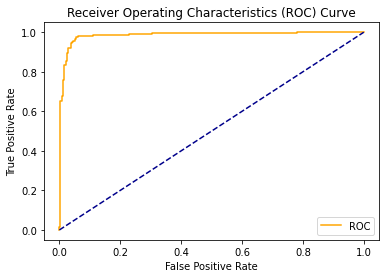

In [45]:
plot_roc_curve(fpr, tpr)